<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-and-Analyse-Data" data-toc-modified-id="Import-and-Analyse-Data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import and Analyse Data</a></span></li><li><span><a href="#Data-Transformation" data-toc-modified-id="Data-Transformation-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data Transformation</a></span></li><li><span><a href="#Split-Data" data-toc-modified-id="Split-Data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Split Data</a></span></li><li><span><a href="#Decision-Tree-Model-&amp;-Classification" data-toc-modified-id="Decision-Tree-Model-&amp;-Classification-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Decision Tree Model &amp; Classification</a></span></li><li><span><a href="#Decision-Tree-Visualization" data-toc-modified-id="Decision-Tree-Visualization-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Decision Tree Visualization</a></span></li><li><span><a href="#Model-Evaluation" data-toc-modified-id="Model-Evaluation-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Model Evaluation</a></span></li><li><span><a href="#Make-Predictions" data-toc-modified-id="Make-Predictions-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Make Predictions</a></span></li></ul></div>

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import tree
import matplotlib.pyplot as plt

## Import and Analyse Data

In [2]:
df = pd.read_csv('Loans_Dataset.csv', sep=',')

In [4]:
print("Dataset Lenght", len(df))
print("Dataset Shape", df.shape)

Dataset Lenght 1000
Dataset Shape (1000, 6)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   initial_payment  1000 non-null   int64 
 1   last_payment     1000 non-null   int64 
 2   credit_score     1000 non-null   int64 
 3   house_number     1000 non-null   int64 
 4   sum              1000 non-null   int64 
 5   result           1000 non-null   object
dtypes: int64(5), object(1)
memory usage: 47.0+ KB


In [6]:
df.isnull().sum()

initial_payment    0
last_payment       0
credit_score       0
house_number       0
sum                0
result             0
dtype: int64

In [7]:
df.head()

,initial_payment,last_payment,credit_score,house_number,sum,result
0,201,10018,250,3046,13515,yes
1,205,10016,395,3044,13660,yes
2,257,10129,109,3251,13746,yes
3,246,10064,324,3137,13771,yes
4,117,10115,496,3094,13822,yes


In [8]:
df.tail()

,initial_payment,last_payment,credit_score,house_number,sum,result
995,413,14914,523,4683,20533,No
996,359,14423,927,4838,20547,No
997,316,14872,613,4760,20561,No
998,305,14926,897,4572,20700,No
999,168,14798,834,4937,20737,No


In [9]:
df['result'].value_counts()

No     521
yes    479
Name: result, dtype: int64

## Data Transformation

In [10]:
df.drop(columns=['sum'], inplace=True)

In [11]:
df['result'] = np.where(df['result'] == "yes", 1, 0)

## Split Data

In [12]:
X = df.drop(columns=['result'])
y = df["result"]

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

In [15]:
len(X_train), len(X_test)

(700, 300)

## Decision Tree Model & Classification

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [17]:
DTree_model = DecisionTreeClassifier(criterion = "entropy", random_state = 100, max_depth=3, min_samples_leaf=5)

DTree_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       random_state=100)

In [18]:
y_pred = DTree_model.predict(X_test)
y_pred

array([0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1])

In [20]:
print('Training score: {:.2f}'.format(DTree_model.score(X_train, y_train)))
print('Test score: {:.2f}'.format(DTree_model.score(X_test, y_test)))

Training score: 0.96
Test score: 0.92


## Decision Tree Visualization

In [23]:
text_representation = tree.export_text(DTree_model)
print(text_representation)

|--- feature_1 <= 12342.50
|   |--- feature_1 <= 11929.00
|   |   |--- feature_3 <= 4469.00
|   |   |   |--- class: 1
|   |   |--- feature_3 >  4469.00
|   |   |   |--- class: 1
|   |--- feature_1 >  11929.00
|   |   |--- feature_3 <= 4347.50
|   |   |   |--- class: 1
|   |   |--- feature_3 >  4347.50
|   |   |   |--- class: 0
|--- feature_1 >  12342.50
|   |--- feature_1 <= 13044.50
|   |   |--- feature_3 <= 3966.50
|   |   |   |--- class: 1
|   |   |--- feature_3 >  3966.50
|   |   |   |--- class: 0
|   |--- feature_1 >  13044.50
|   |   |--- feature_3 <= 3127.50
|   |   |   |--- class: 0
|   |   |--- feature_3 >  3127.50
|   |   |   |--- class: 0



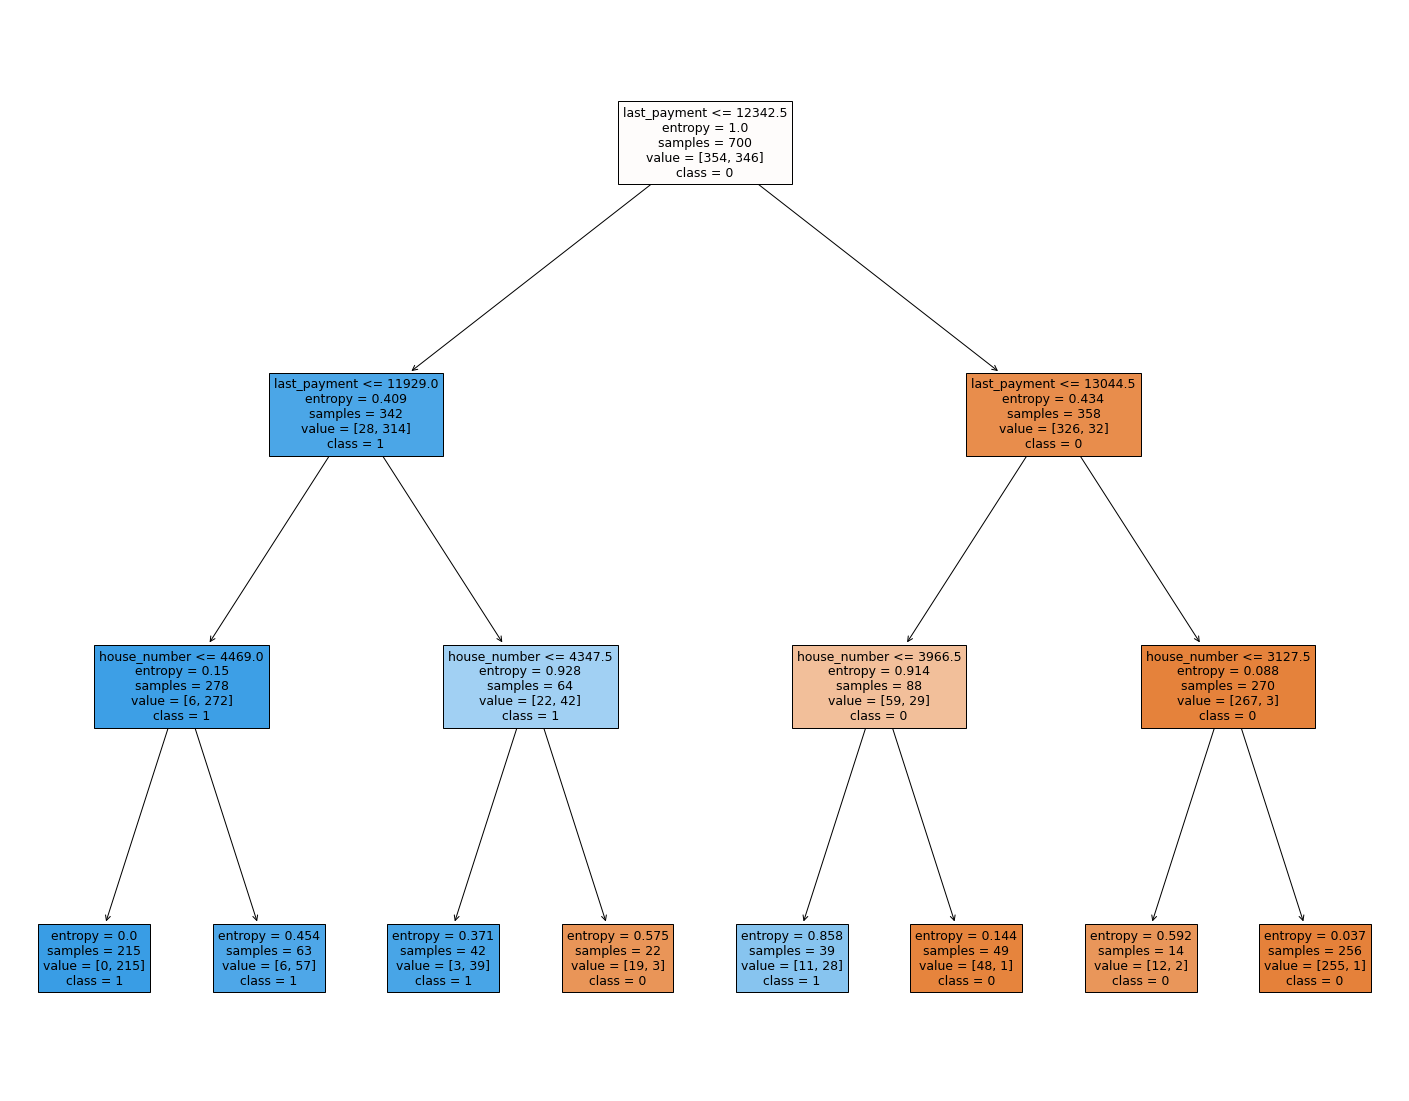

In [25]:
fig = plt.figure(figsize=(25, 20))
class_names = [str(label) for label in DTree_model.classes_]
_ = tree.plot_tree(DTree_model, feature_names=X.columns, class_names=class_names, filled=True)

## Model Evaluation

In [26]:
print(confusion_matrix(y_test, y_pred))

[[151  16]
 [  8 125]]


## Make Predictions

In [27]:
X.describe().loc['mean']

initial_payment      294.343
last_payment       12465.884
credit_score         528.042
house_number        4027.011
Name: mean, dtype: float64

In [30]:
client = np.array([[300, 10000, 300, 4000]])

In [31]:
DTree_model.predict(client)

array([1])